# No-Show Appointments Data Set Analysis

## What are the questions that we will answer in our Analysis phase for this data set ?

This phase will be divied to two phases the first phase will answer some public questions related to the whole dataset.  
1. what is the common neighbourhood in the dataset ?  
2. what is the common month in the dataset?  
3. what is the common weekday in the dataset?  
4. what is the common gender in the dataset?
5. was it common to receive sms in the dataset or not ?
6. was it comon to make no-show appointments ?
The second phase the dataset will be divided to small groups and some questions will be answered to each group.
- The first dataset is derived from the main dataset based on scholarship.  
- The second dataset is derived from the main dataset based on hipertension.  
- The third dataset is derived from the main dataset based on diabetes. 
- The fourth dataset is derived from the main dataset based on alcoholism.  
- The fifth dataset is derived from the main dataset based on alcoholism & Handcap & Schloarship 
for each each dataset we will answer the following questions:  
1- What is the common gender for the group ?  
2- what is the common day for the group?   
3- what is the common hour for the group in schedulededday column?  
4- what is the common neighbourhood for the group?   
5- was it common to receive SMS for the group?  
6- what is the gender distribution for the group?   
7- what is the receving SMS distribution for the group?    
Each group is divided into show appointment / no-show appointment and each group get the above questions answered.

In [366]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
os.chdir("E:\\Learning Videos\\EGYFWD\\Project2")

## Read Data

In [367]:
mdf=pd.read_csv("./noshowappointments-kagglev2-may-2016.csv")


## Check data

In [368]:
mdf.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [369]:
mdf.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

## Convert Columns' names to lower case 

In [370]:
mdf=mdf.rename(axis='columns',mapper=lambda x:x.lower())
mdf.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

## Check unique values for columns

In [371]:
mdf['scholarship'].nunique()

2

In [372]:
mdf['diabetes'].nunique()

2

In [373]:
mdf['hipertension'].nunique()

2

In [374]:
mdf['gender'].nunique()

2

In [375]:
mdf['alcoholism'].nunique()

2

In [376]:
mdf['sms_received'].nunique()

2

In [377]:
mdf['handcap'].nunique()

5

In [378]:
mdf['appointmentday']

0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: appointmentday, Length: 110527, dtype: object

## Convert data types  
In this phase will convert datatypes for some columns :  
1. handcap to boolean  
2. scholarship to boolean.   
3. hipertension to boolean.    
4. alcoholism to boolean.  
5. sms_received to boolean.   
6. diabetes to boolean.  
7. handcap to boolean.  
8. scheduledday to datetime .
9. appointmentday to datetime.  


In [379]:
mdf['scheduledday']=pd.to_datetime(mdf['scheduledday'])
mdf['appointmentday']=pd.to_datetime(mdf['appointmentday'])
mdf['sms_received']=mdf['sms_received'].astype(bool)
mdf['scholarship']=mdf['scholarship'].astype(bool)
mdf['handcap']=mdf['handcap'].astype(bool)
mdf['diabetes']=mdf['diabetes'].astype(bool)
mdf['alcoholism']=mdf['alcoholism'].astype(bool)
mdf['hipertension']=mdf['hipertension'].astype(bool)

In [380]:
mdf.dtypes

patientid                     float64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                      bool
hipertension                     bool
diabetes                         bool
alcoholism                       bool
handcap                          bool
sms_received                     bool
no-show                        object
dtype: object

## Extract the week day name & Hour & Hour & Month name from scheduledday column

In [381]:
mdf['hour']=mdf['scheduledday'].dt.hour
mdf['month']=mdf['scheduledday'].dt.month_name()
mdf['week_day']=mdf['scheduledday'].dt.day_name()

## Analysis Phase :

In [382]:
def get_female(df):
    female_df=DateFrame(df[df['gender']=='F'])
    return female_df
def get_common_month(df):
    common_month=df['month'].mode()[0]
    return common_month
def get_common_weekday(df):
    common_weekday=df['week_day'].mode()[0]
    return common_weekday
def get_male(df):
    male_df=DateFrame(df[df['gender']=='F'])
    return male_df
def get_common_neighbourhood(df):
    common_neighbourhood=df['neighbourhood'].mode()[0]
    return common_neighbourhood
def get_no_show(df):
    no_showdf=pd.DataFrame(df[df['no-show']=='Yes'])
    return no_showdf
def get_show(df):
    showdf=pd.DataFrame(df[df['no-show']=='No'])
    return showdf
def is_it_common_to_receive_sms(df):
    is_receving_sms=df['sms_received'].mode()[0]
    return is_receving_sms
def get_common_gender(df):
    common_gender=df['gender'].mode()[0]
    if common_gender=='F':
        return "Female"
    else:
        return "Male"
def is_common_noshow(df):
    is_common_noshowAppointment=df['no-show'].mode()[0]
    return is_common_noshowAppointment
def get_gender_distribution(df):
    gender_distribution=pd.DataFrame(df['gender'].value_counts())
    return gender_distribution
def get_sms_distribution(df):
    sms_distribution=pd.DataFrame(df['sms_received'].value_counts())
    return sms_distribution
def get_common_hour(df):
    common_hour=df['hour'].mode()[0]
    return common_hour
def get_neighbourhood_distribution(df,group):
    neighbourhood_distribution=pd.DataFrame(df['neighbourhood'].value_counts())
    neighbourhood_distribution=neighbourhood_distribution.head(10)
    title="Top 10 Neighbourhood Distribution "+str(group)+"Patient"
    plot_fig=neighbourhood_distribution.plot(kind='bar',ylabel="Number of Patients",xlabel='Neighbourhood',title=title)
    return plot_fig

    

### General Analysis

##### What is the common neighbourhood in the dataset ?

In [383]:
mdf['neighbourhood'].mode()[0]

'JARDIM CAMBURI'

##### What is the common gender in the dataset ?


In [384]:
get_common_gender(mdf)

'Female'

##### What is the common month in the dataset ?

In [385]:
get_common_month(mdf)

'May'

##### What is the common day in the dataset ?

In [386]:
get_common_weekday(mdf)

'Tuesday'

##### Was it is the common to receive_sms in the dataset ?

In [387]:
is_it_common_to_receive_sms(mdf)

False

array([<AxesSubplot:ylabel='no-show'>], dtype=object)

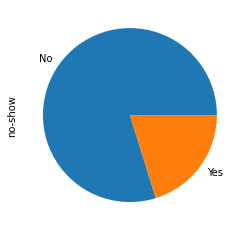

In [388]:
mdf['no-show'].value_counts().plot(kind='pie',subplots='True')

From the above figure it isn't common to make no-show appoointments.

#### Scholarship Group:

In [389]:
scholarshipdf=mdf[mdf['scholarship']==True]
scholarshipdf.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,hour,month,week_day
12,5.666548e+14,5634718,F,2016-04-28 11:33:51+00:00,2016-04-29 00:00:00+00:00,22,NOVA PALESTINA,True,False,False,False,False,False,No,11,April,Thursday
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,True,False,False,False,False,False,Yes,9,April,Thursday
18,1.713538e+13,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,True,False,False,False,False,True,No,10,April,Tuesday
31,3.112849e+11,5628907,M,2016-04-27 12:07:14+00:00,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,True,False,False,False,False,False,Yes,12,April,Wednesday
33,7.653517e+12,5616921,F,2016-04-25 15:01:04+00:00,2016-04-29 00:00:00+00:00,38,SÃO CRISTÓVÃO,True,False,False,False,False,True,No,15,April,Monday


##### What is the common weekday for scholarship group?

In [390]:
get_common_weekday(scholarshipdf)

'Tuesday'

##### What is the common Month for scholarship group?

In [391]:
get_common_month(scholarshipdf)

'May'

##### What is the common Neighbourhood for scholarship group?

In [392]:
get_common_neighbourhood(scholarshipdf)

'ILHA DO PRÍNCIPE'

##### What is the common gender for scholarship group?

In [393]:
get_common_gender(scholarshipdf)

'Female'

##### was it common to receive SMS for Scholarship group ?

In [394]:
is_it_common_to_receive_sms(scholarshipdf)

False

#### What is the gender distribution for scholarship group ?

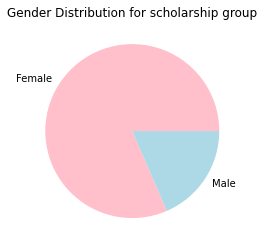

In [395]:
scholarship_gender_distribution=get_gender_distribution(scholarshipdf)
plt.title('Gender Distribution for scholarship group')
plt.pie(scholarship_gender_distribution['gender'],labels=['Female','Male'],colors=['pink','lightblue'])
plt.show()

From the above figure the gender distribution for scholarship patients Females are more than Males.  

#### What is the SMS distribution for Scholarship Group ?

In [396]:
sms_scholarship_distribution=get_sms_distribution(scholarshipdf)
sms_scholarship_distribution.head()

,sms_received
False,7356
True,3505


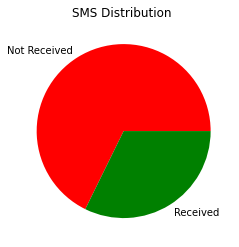

In [397]:
plt.title("SMS Distribution ")
plt.pie(sms_scholarship_distribution['sms_received'],labels=['Not Received','Received'],colors=['red','green'])
plt.show()

From the above figure most of patients don't receive sms.  

#### Which scholarship gender make show appointment more ?

In [398]:
schloarship_showdf=scholarshipdf[scholarshipdf['no-show']=='No']
get_common_gender(schloarship_showdf)

'Female'

#### which neighbourhood that has show appointment for schlorship Patient?

In [399]:
get_common_neighbourhood(schloarship_showdf)

'ILHA DO PRÍNCIPE'

#### which month that has show appointment for scholarship Patient ?

In [400]:
get_common_month(schloarship_showdf)

'May'

#### which common_day for show appointment for scholarship Patient ?

In [401]:
get_common_weekday(schloarship_showdf)

'Tuesday'

#### which gender distribution for show appointment for scholarship Patient?

In [402]:
show_scholarship_gender_df=get_gender_distribution(schloarship_showdf)
show_scholarship_gender_df

,gender
F,6747
M,1536


([<matplotlib.patches.Wedge at 0x2129836ca30>,
 [Text(-0.918552292592614, 0.6051955764650409, 'Female'),
  Text(0.9185522925926142, -0.6051955764650405, 'Male')])

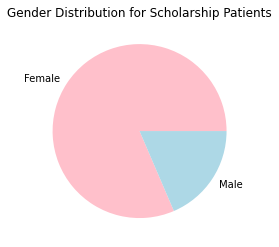

In [403]:
plt.title("Gender Distribution for Scholarship Patients")
plt.pie(show_scholarship_gender_df['gender'],labels=['Female','Male'],colors=['pink','lightblue'])

from the above figure females are more than males for scholarship show appointment patients.  

In [404]:
schloarship_showdf.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,hour,month,week_day
12,5.666548e+14,5634718,F,2016-04-28 11:33:51+00:00,2016-04-29 00:00:00+00:00,22,NOVA PALESTINA,True,False,False,False,False,False,No,11,April,Thursday
18,1.713538e+13,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,True,False,False,False,False,True,No,10,April,Tuesday
33,7.653517e+12,5616921,F,2016-04-25 15:01:04+00:00,2016-04-29 00:00:00+00:00,38,SÃO CRISTÓVÃO,True,False,False,False,False,True,No,15,April,Monday
37,1.578132e+12,5637986,F,2016-04-29 07:35:56+00:00,2016-04-29 00:00:00+00:00,64,TABUAZEIRO,True,True,True,False,False,False,No,7,April,Friday
60,9.291168e+12,5628739,M,2016-04-27 11:32:14+00:00,2016-04-29 00:00:00+00:00,8,NOVA PALESTINA,True,False,False,False,False,False,No,11,April,Wednesday


#### which hour is common for show schlarship Patient ? 

In [405]:
get_common_hour(schloarship_showdf)

7

#### No SHow appointment for Scholarship patient

In [406]:
no_show_scholarship_df=scholarshipdf[scholarshipdf['no-show']=='Yes']

#### Which gender is common to make no-show appointment for scholarship group ?

In [407]:
get_common_gender(no_show_scholarship_df)

'Female'

#### Which neighbourhood is common to make no-show appointment for scholarship group?

In [408]:
get_common_neighbourhood(no_show_scholarship_df)

'ILHA DO PRÍNCIPE'

In [409]:
scholarship_no_show_sms=get_sms_distribution(no_show_scholarship_df)
scholarship_no_show_sms.head()

,sms_received
False,1394
True,1184


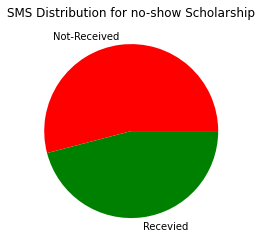

In [410]:
plt.title("SMS Distribution for no-show Scholarship")
plt.pie(scholarship_no_show_sms['sms_received'],labels=['Not-Received','Recevied'],colors=['red','green'])
plt.show()

From the above figure most of patients don't receive sms.  

#### what is the common day for no-show appointment for scholarship group?

In [411]:
get_common_weekday(no_show_scholarship_df)

'Tuesday'

#### what is the common month for no-show appointment for scholarship group?

In [412]:
get_common_month(no_show_scholarship_df)

'May'

#### what is the common hour for no-show appointment for scholarship group?

In [413]:
get_common_hour(no_show_scholarship_df)

8

#### Top 10 Neighbourhood for Scholarship

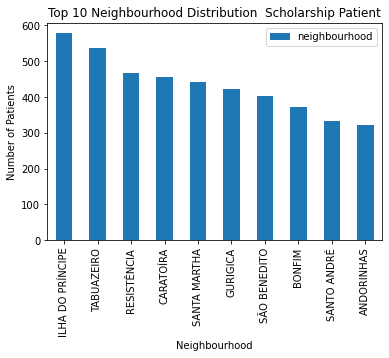

In [414]:
neighbourhood_schlorship_distribution=get_neighbourhood_distribution(scholarshipdf," Scholarship ")


## Alcoholism

In [415]:
alcoholism_df=mdf[mdf['alcoholism']==True]
alcoholism_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,hour,month,week_day
46,1.379437e+11,5615608,M,2016-04-25 12:44:36+00:00,2016-04-29 00:00:00+00:00,58,SÃO CRISTÓVÃO,False,True,False,True,False,True,No,12,April,Monday
131,4.755938e+13,5637150,M,2016-04-28 17:38:06+00:00,2016-04-29 00:00:00+00:00,29,PRAIA DO SUÁ,False,False,False,True,False,False,Yes,17,April,Thursday
133,3.587186e+12,5580520,M,2016-04-14 07:07:10+00:00,2016-04-29 00:00:00+00:00,69,PRAIA DO SUÁ,False,False,True,True,False,False,No,7,April,Thursday
186,7.329661e+13,5587737,M,2016-04-15 09:02:16+00:00,2016-04-29 00:00:00+00:00,66,REDENÇÃO,False,True,False,True,False,False,No,9,April,Friday
207,6.359796e+13,5642700,M,2016-04-29 16:49:22+00:00,2016-04-29 00:00:00+00:00,46,MARUÍPE,False,False,False,True,False,False,No,16,April,Friday


### What is the common gender ?

In [416]:
get_common_gender(alcoholism_df)

'Male'

([<matplotlib.patches.Wedge at 0x2129f22aeb0>,
 [Text(-0.4558505608072935, 1.0010995286242403, 'Male'),
  Text(0.45585056080729336, -1.0010995286242403, 'Female')])

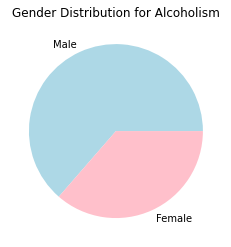

In [417]:
gender_distribution_alcoholism=get_gender_distribution(alcoholism_df)
plt.title("Gender Distribution for Alcoholism")
plt.pie(gender_distribution_alcoholism['gender'],colors=['lightblue','pink'],labels=['Male','Female'])

From the above figure the males are more than females for alcoholism patients

In [418]:
sms_alcoholism_distribtuion=get_sms_distribution(alcoholism_df)

([<matplotlib.patches.Wedge at 0x212a12ad880>,
 [Text(-0.5814684804599021, 0.9337528614315742, 'No-Received'),
  Text(0.5814685678841521, -0.9337528069905617, 'Received')])

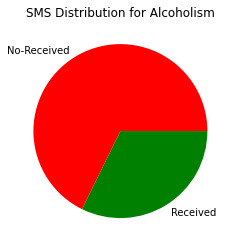

In [419]:
plt.title("SMS Distribution for Alcoholism")
plt.pie(sms_scholarship_distribution['sms_received'],colors=['red','green'],labels=['No-Received','Received'])

From the above figure most of patients don't receive sms.  

In [420]:
get_common_month(alcoholism_df)

'May'

In [421]:
get_common_weekday(alcoholism_df)

'Tuesday'

In [422]:
get_common_hour(alcoholism_df)

7

In [423]:
get_common_neighbourhood(alcoholism_df)

'SANTA MARTHA'

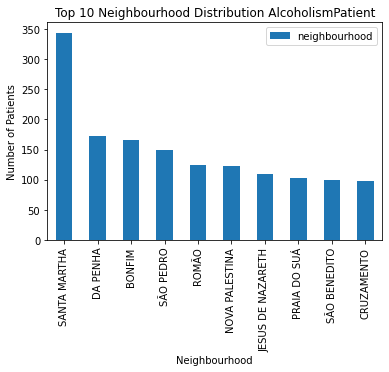

In [424]:
neighbourhood_distribution=get_neighbourhood_distribution(alcoholism_df,"Alcoholism")


In [425]:
show_alcoholism_df=get_show(alcoholism_df)

In [426]:
get_common_neighbourhood(show_alcoholism_df)

'SANTA MARTHA'

In [427]:
get_common_weekday(show_alcoholism_df)

'Wednesday'

In [428]:
get_common_month(show_alcoholism_df)

'May'

In [429]:
get_common_hour(show_alcoholism_df)

7

In [430]:
show_gender_distribtuion_alcoholism=get_gender_distribution(show_alcoholism_df)
show_gender_distribtuion_alcoholism

,gender
M,1768
F,915


([<matplotlib.patches.Wedge at 0x212a1338be0>,
 [Text(-0.5267884955401272, 0.9656572274707882, 'Male'),
  Text(0.5267884955401275, -0.9656572274707881, 'Female')])

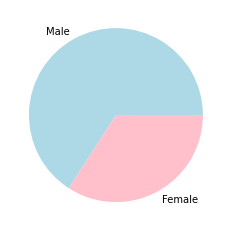

In [431]:
plt.pie(show_gender_distribtuion_alcoholism['gender'],labels=['Male','Female'],colors=['lightblue','pink'])

From the above figure the males are more than females for make show appointments.

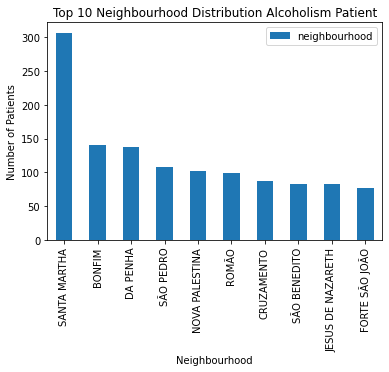

In [432]:
neighbourhood_distribution_show_alcoholism=get_neighbourhood_distribution(show_alcoholism_df,"Alcoholism ")


In [433]:
show_sms_distribution_alcoholism=get_sms_distribution(show_alcoholism_df)
show_sms_distribution_alcoholism

,sms_received
False,2113
True,570


### No Show Alocoholism 

In [434]:

alocholism_no_show=get_no_show(alcoholism_df)

In [435]:
get_common_gender(alocholism_no_show)

'Male'

In [436]:
get_common_month(alocholism_no_show)

'May'

In [437]:
get_common_weekday(alocholism_no_show)

'Tuesday'

In [438]:
get_common_neighbourhood(alocholism_no_show)

'SÃO PEDRO'

In [439]:
get_common_hour(alocholism_no_show)

7

In [440]:
gender_distribution_no_show_alcoholism=get_gender_distribution(alocholism_no_show)
gender_distribution_no_show_alcoholism

,gender
M,369
F,308


([<matplotlib.patches.Wedge at 0x212a13d3b80>,
 [Text(-0.15516821224994487, 1.0890008383408878, 'Male'),
  Text(0.1551682122499445, -1.0890008383408878, 'Femal')])

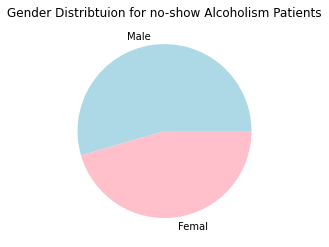

In [441]:
plt.title("Gender Distribtuion for no-show Alcoholism Patients")
plt.pie(gender_distribution_no_show_alcoholism['gender'],labels=['Male','Femal'],colors=['lightblue','pink'])

From the above figure males are more than females for no show alcoholism patients.

In [442]:
sms_distribution_for_no_show_alcoholism=get_sms_distribution(alocholism_no_show)
sms_distribution_for_no_show_alcoholism

,sms_received
False,400
True,277


### Handcap Patient

In [443]:
handcap_df=mdf[mdf['handcap']==True]

In [444]:
get_common_gender(handcap_df)

'Female'

In [445]:
get_common_neighbourhood(handcap_df)

'SANTA MARTHA'

In [446]:
get_common_month(handcap_df)

'May'

In [447]:
get_common_hour(handcap_df)

9

In [448]:
get_common_weekday(handcap_df)

'Tuesday'

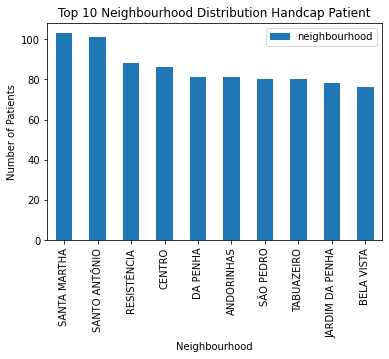

In [449]:
neighbourhood_distribution_handcap=get_neighbourhood_distribution(handcap_df,"Handcap ")


In [450]:
get_sms_distribution(handcap_df)

,sms_received
False,1705
True,536


In [451]:
handcap_show_df=get_show(handcap_df)

In [452]:
get_common_hour(handcap_show_df)

9

In [453]:
get_common_month(handcap_show_df)

'May'

In [454]:
get_common_neighbourhood(handcap_show_df)

'SANTA MARTHA'

In [455]:
get_common_weekday(handcap_show_df)

'Tuesday'

In [456]:
get_common_gender(handcap_show_df)

'Female'

In [457]:
get_sms_distribution(handcap_show_df)

,sms_received
False,1433
True,401


<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Handcap show appointment Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

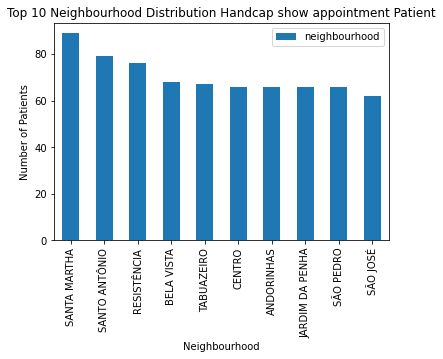

In [458]:
get_neighbourhood_distribution(handcap_show_df,"Handcap show appointment ")

In [459]:
### No show handcap

In [460]:
no_show_handcap=get_no_show(handcap_df)

In [461]:
get_sms_distribution(no_show_handcap)

,sms_received
False,272
True,135


In [462]:
get_common_gender(no_show_handcap)

'Female'

In [463]:
get_common_weekday(no_show_handcap)

'Tuesday'

In [464]:
get_common_hour(no_show_handcap)

7

In [465]:
get_common_month(no_show_handcap)

'May'

In [466]:
get_common_neighbourhood(no_show_handcap)

'DA PENHA'

In [467]:
get_sms_distribution(no_show_handcap)

,sms_received
False,272
True,135


<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Handcap no show appointment Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

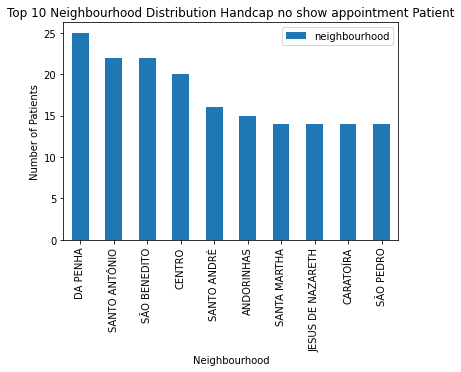

In [468]:
get_neighbourhood_distribution(no_show_handcap,"Handcap no show appointment ")

### Diabetes

In [469]:
diabetes_df=mdf[mdf['diabetes']==True]

In [470]:
get_common_gender(diabetes_df)

'Female'

In [471]:
get_common_weekday(diabetes_df)

'Tuesday'

In [472]:
get_common_month(diabetes_df)

'May'

In [473]:
get_sms_distribution(diabetes_df)

,sms_received
False,5587
True,2356


<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Diabetes Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

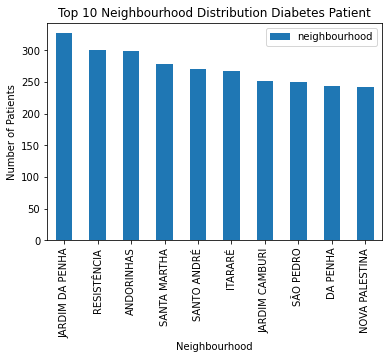

In [474]:
get_neighbourhood_distribution(diabetes_df,'Diabetes ')

In [475]:
get_gender_distribution(diabetes_df)

,gender
F,5606
M,2337


### show diabetes

In [476]:
show_diabetes=get_show(diabetes_df)

In [477]:
get_common_gender(show_diabetes)

'Female'

In [478]:
get_common_weekday(show_diabetes)

'Tuesday'

In [479]:
get_common_month(show_diabetes)

'May'

In [480]:
get_common_hour(show_diabetes)

7

In [481]:
get_common_neighbourhood(show_diabetes)

'JARDIM DA PENHA'

In [482]:
get_sms_distribution(show_diabetes)

,sms_received
False,4701
True,1812


<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Show appointment diabetes Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

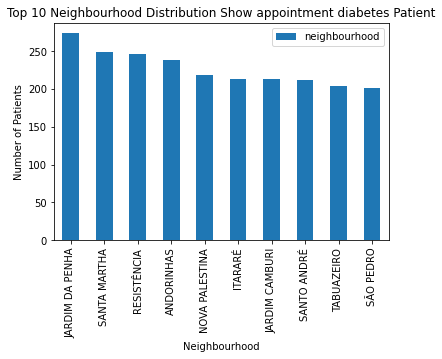

In [483]:
get_neighbourhood_distribution(show_diabetes,"Show appointment diabetes ")

## No show diabetes

In [484]:
no_show_diabetes=get_no_show(diabetes_df)

In [485]:
get_sms_distribution(no_show_diabetes)

,sms_received
False,886
True,544


In [486]:
get_common_weekday(no_show_diabetes)

'Tuesday'

In [487]:
get_common_month(no_show_diabetes)

'May'

In [488]:
get_common_hour(no_show_diabetes)

7

In [489]:
get_gender_distribution(no_show_diabetes)

,gender
F,1017
M,413


In [490]:
get_sms_distribution(no_show_diabetes)

,sms_received
False,886
True,544


In [491]:
get_common_neighbourhood(no_show_diabetes)

'ANDORINHAS'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution No Show Appointment Diabetes Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

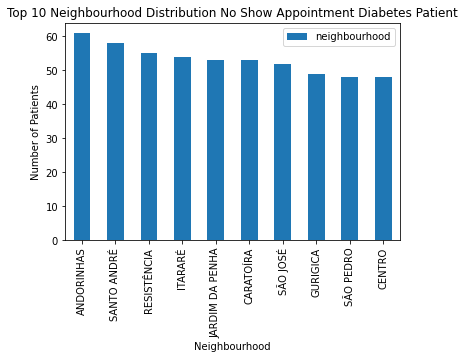

In [492]:
get_neighbourhood_distribution(no_show_diabetes,"No Show Appointment Diabetes ")

In [493]:
### Handcap & Scholarship & Diabetes

In [494]:
scholarship_hand_diabetes_df=mdf[mdf['diabetes']==True]
scholarship_hand_diabetes_df=scholarship_hand_diabetes_df[scholarship_hand_diabetes_df['scholarship']==True]
scholarship_hand_diabetes_df[scholarship_hand_diabetes_df['handcap']== True]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,hour,month,week_day
18024,1.576634e+13,5718741,F,2016-05-19 10:02:47+00:00,2016-05-25 00:00:00+00:00,57,ILHA DAS CAIEIRAS,True,True,True,False,True,False,Yes,10,May,Thursday
21385,2.494925e+14,5732601,F,2016-05-24 11:57:40+00:00,2016-05-30 00:00:00+00:00,54,JESUS DE NAZARETH,True,True,True,False,True,True,Yes,11,May,Tuesday
30121,5.988381e+12,5674732,F,2016-05-09 11:46:41+00:00,2016-05-11 00:00:00+00:00,42,MARUÍPE,True,True,True,False,True,False,No,11,May,Monday
56569,9.243818e+14,5647960,F,2016-05-02 14:46:09+00:00,2016-05-02 00:00:00+00:00,57,ILHA DO PRÍNCIPE,True,True,True,False,True,False,No,14,May,Monday
58295,5.992195e+12,5653807,F,2016-05-03 13:20:46+00:00,2016-05-03 00:00:00+00:00,42,REDENÇÃO,True,True,True,False,True,False,No,13,May,Tuesday
58304,5.992195e+12,5655139,F,2016-05-03 16:05:47+00:00,2016-05-10 00:00:00+00:00,42,REDENÇÃO,True,True,True,False,True,True,No,16,May,Tuesday
61098,9.312985e+09,5717143,F,2016-05-19 07:35:55+00:00,2016-05-19 00:00:00+00:00,73,SANTA MARTHA,True,True,True,False,True,False,No,7,May,Thursday
71728,5.992195e+12,5556271,F,2016-04-07 11:37:54+00:00,2016-05-06 00:00:00+00:00,42,REDENÇÃO,True,True,True,False,True,True,No,11,April,Thursday
74776,5.992195e+12,5682074,F,2016-05-10 15:42:43+00:00,2016-05-19 00:00:00+00:00,42,REDENÇÃO,True,True,True,False,True,False,No,15,May,Tuesday
85098,2.855232e+14,5781208,F,2016-06-07 09:10:25+00:00,2016-06-08 00:00:00+00:00,62,DA PENHA,True,True,True,False,True,False,No,9,June,Tuesday


In [495]:
get_common_gender(scholarship_hand_diabetes_df)

'Female'

In [496]:
get_common_neighbourhood(scholarship_hand_diabetes_df)

'NOVA PALESTINA'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Handcap & Diabetes & Scholarship Patient Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

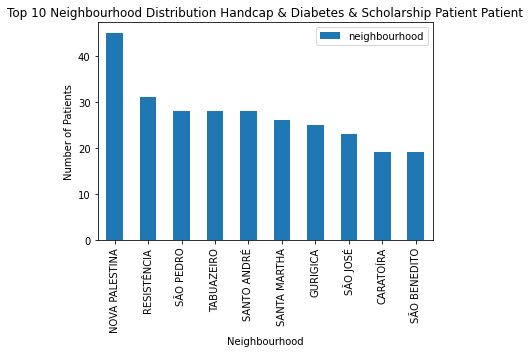

In [497]:
get_neighbourhood_distribution(scholarship_hand_diabetes_df,"Handcap & Diabetes & Scholarship Patient ")

In [498]:
get_sms_distribution(scholarship_hand_diabetes_df)

,sms_received
False,392
True,177


In [499]:
show_diabetes_hand_scholarship_df=get_show(scholarship_hand_diabetes_df)

In [500]:
get_common_gender(show_diabetes_hand_scholarship_df)

'Female'

In [501]:
get_common_hour(show_diabetes_hand_scholarship_df)

7

In [502]:
get_common_weekday(show_diabetes_hand_scholarship_df)

'Tuesday'

In [503]:
get_common_neighbourhood(show_diabetes_hand_scholarship_df)

'NOVA PALESTINA'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Show Handcap & Scholarship & diabetes Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

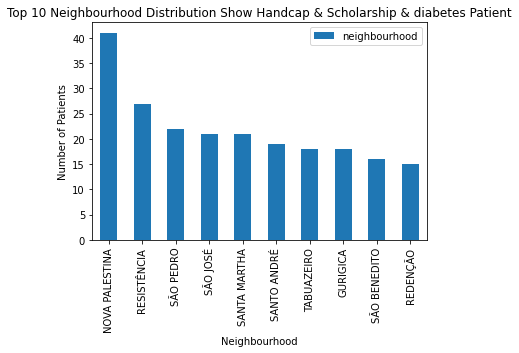

In [504]:
get_neighbourhood_distribution(show_diabetes_hand_scholarship_df,"Show Handcap & Scholarship & diabetes ")

In [505]:
no_show_diabetes_hand_scholarship_df=get_no_show(scholarship_hand_diabetes_df)

In [506]:
get_common_gender(no_show_diabetes_hand_scholarship_df)

'Female'

In [507]:
get_gender_distribution(no_show_diabetes_hand_scholarship_df)

,gender
F,113
M,10


In [508]:
get_common_neighbourhood(no_show_diabetes_hand_scholarship_df)

'TABUAZEIRO'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution No Show appointment for handcap & diabetes & scholarship  Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

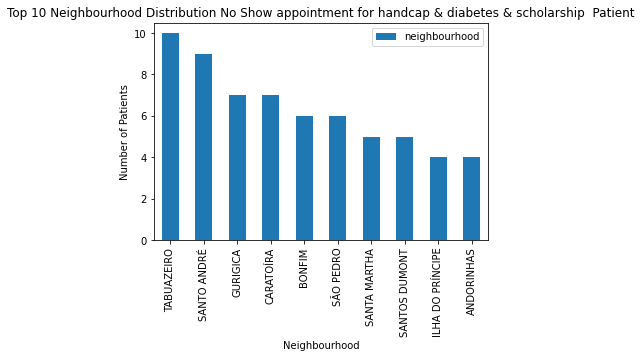

In [509]:
get_neighbourhood_distribution(no_show_diabetes_hand_scholarship_df,"No Show appointment for handcap & diabetes & scholarship  ")

### Hipertension Group 

In [510]:
hipertesion=mdf[mdf['hipertension']==True]

In [511]:
get_common_gender(hipertesion)

'Female'

In [512]:
get_common_hour(hipertesion)

7

In [513]:
get_common_neighbourhood(hipertesion)

'JARDIM DA PENHA'

In [514]:
get_common_weekday(hipertesion)

'Tuesday'

In [515]:
get_common_month(hipertesion)

'May'

In [516]:
get_gender_distribution(hipertesion)

,gender
F,15339
M,6462


In [517]:
get_sms_distribution(hipertesion)

,sms_received
False,14931
True,6870


### Show Hipertension

In [518]:
show_hipertension=get_show(hipertesion)

### What is the common hour for hipertension patients?

In [519]:
get_common_hour(show_hipertension)

7

### What is the common day for hipertension patients?

In [520]:
get_common_weekday(show_hipertension)

'Tuesday'

### What is the common month for hipertension patients?

In [521]:
get_common_month(show_hipertension)

'May'

### What is the common gender for hipertension patients?

In [522]:
get_common_gender(show_hipertension)

'Female'

In [523]:
get_gender_distribution(show_hipertension)

,gender
F,12682
M,5347


In [524]:
get_sms_distribution(show_hipertension)

,sms_received
False,12704
True,5325


### What is the common neighbourhood for hipertension patients?

In [525]:
get_common_neighbourhood(show_hipertension)

'JARDIM DA PENHA'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Show Hipertnesion Appointment Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

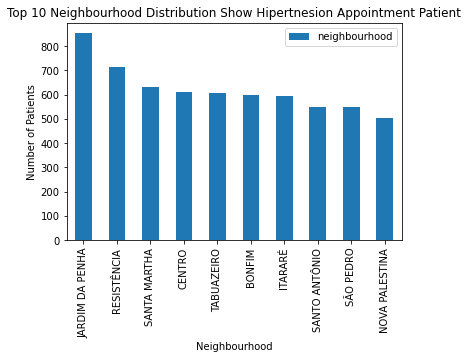

In [526]:
get_neighbourhood_distribution(show_hipertension,'Show Hipertnesion Appointment ')

### No Show hipertension Patients

In [527]:
no_show_hipertension=get_no_show(hipertesion)

### What is the common hour for No Show hipertension  patients?

In [528]:
get_common_hour(no_show_hipertension)

7

### What is the common month for No Show hipertension  patients?

In [529]:
get_common_month(no_show_hipertension)

'May'

### What is the common weekday for No Show hipertension  patients?

In [530]:
get_common_weekday(no_show_hipertension)

'Tuesday'

In [531]:
get_sms_distribution(no_show_hipertension)

,sms_received
False,2227
True,1545


In [532]:
get_gender_distribution(no_show_hipertension)

,gender
F,2657
M,1115


In [533]:
get_common_neighbourhood(no_show_hipertension)

'ITARARÉ'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution No Show Hipertension Appointment Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

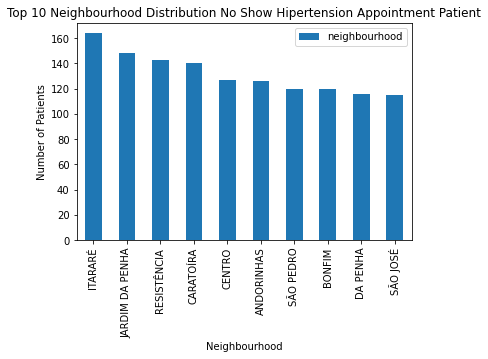

In [534]:
get_neighbourhood_distribution(no_show_hipertension,"No Show Hipertension Appointment ")

## Show Appointment For Hipertension Patients

In [535]:
hipertension_show=get_show(hipertesion)
hipertension_show

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,hour,month,week_day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No,18,April,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No,16,April,Friday
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,False,True,False,False,False,False,No,8,April,Wednesday
25,5.819370e+12,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,False,True,False,False,False,True,No,15,April,Tuesday
26,2.578785e+10,5641781,F,2016-04-29 14:19:42+00:00,2016-04-29 00:00:00+00:00,45,BENTO FERREIRA,False,True,False,False,False,False,No,14,April,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110471,3.187119e+14,5781360,F,2016-06-07 09:23:18+00:00,2016-06-07 00:00:00+00:00,84,RESISTÊNCIA,False,True,False,False,False,False,No,9,June,Tuesday
110475,2.123885e+14,5779726,F,2016-06-07 07:14:07+00:00,2016-06-07 00:00:00+00:00,54,RESISTÊNCIA,False,True,False,False,False,False,No,7,June,Tuesday
110476,9.278752e+12,5678369,F,2016-05-10 08:25:25+00:00,2016-06-06 00:00:00+00:00,80,RESISTÊNCIA,False,True,False,False,False,True,No,8,May,Tuesday
110483,1.642781e+12,5769404,F,2016-06-03 08:47:58+00:00,2016-06-03 00:00:00+00:00,60,PRAIA DO CANTO,False,True,False,False,False,False,No,8,June,Friday


In [536]:
gender_distribution_hipertension_show=get_gender_distribution(hipertension_show)
gender_distribution_hipertension_show

,gender
F,12682
M,5347


In [537]:
sms_distribution_show_hipertension=get_sms_distribution(hipertension_show)
sms_distribution_show_hipertension

,sms_received
False,12704
True,5325


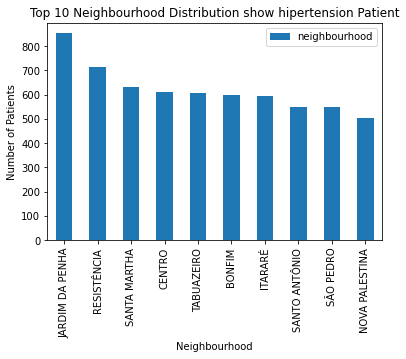

In [538]:
neighbourhood_show_hipertension_distribution=get_neighbourhood_distribution(hipertension_show,"show hipertension ")

### What is the common neighbourhood in show hipertension pateints?

In [539]:
get_common_neighbourhood(hipertension_show)

'JARDIM DA PENHA'

### What is the common hour in show hipertension pateints?

In [540]:
get_common_hour(hipertension_show)

7

### What is the common month in show hipertension patients ?

In [541]:
get_common_month(hipertension_show)

'May'

## Conclusions

- The most common show appointment is done on ***Tuesday*** 
- The most common show appointment is done in ***May***
- The most common show appointment is done at ***7 AM.***
- Sending SMS to the patients has no impact and recommended to stop sending it and save this cost where most of show patients don't receive the SMS and come to the hospital.
- it is recommended to reduce the vacations of medical staff on **Tuesday** or at least keep the full manpower in hospitals between **7 and 10 AM**.
- Increase public Transportation to **"JARDIM DA PENHA"** Neighbourhood on Tuesday between **7 AM. and 11 AM.** since those times hipertension & Diabetes made most show appointment for this neighbourhood.
- Increase police forces on Wednesday in **"SANTA MARTHA"** neighbourhood since alcoholism patients make their show appointments at 7 AM.
- Incease  public Transportation with aids for hancap patients on Tuesday to **"SANTA MARTHA"** between 7 and 10 AM. since common handcap show appointment was in that time.